# This notebook deals with measuring the performance of the affine estimator on removing increasing number of columns and increasingly large squares from the center of the image. We also measure the performance if we were to use the average MNIST digit instead to estimate the unknown section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from mnist_preprocessing import *

%matplotlib inline


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
def Wstar(cov_x, cov_yx):
    if cov_x.any():
        cov_x_inv = np.linalg.pinv(cov_x)
    else:
        cov_x_inv = cov_x
    W = np.dot(cov_yx, cov_x_inv)
    return W

def mmseEstimator(x, u_x, u_y, cov_x, cov_yx):
    W = Wstar(cov_x, cov_yx)
    dist = x - u_x.reshape((u_x.shape[0]), 1)
    return np.dot(W, dist) + u_y.reshape((u_y.shape[0]), 1)

In [3]:
train, test = returnData()

----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000


In [4]:
# -------------------------------------------------------------
#  Removing Different Number of Columns with MMSE estimator
# -------------------------------------------------------------
train_colMSEs = np.zeros(28)
test_colMSEs = np.zeros(28)
splitTest_colMSEs = np.zeros((28,10))
splitTest_means_col = np.zeros(28)
splitTest_stddevs_col = np.zeros(28)

for i in range(28):
    nCols = (i+1)
    vecMask = generateColumnMask(nCols)
        
    train_hideRight, Xtrain_hideRight, Ytrain_hideRight, \
    test_hideRight, Xtest_hideRight, Ytest_hideRight = returnHalfData(nCols)
    
    u_x, u_y, cov_x, cov_yx = getStatistics(train, vecMask)
    Ytrain_hideRight_hat = mmseEstimator(Xtrain_hideRight, u_x, u_y, cov_x, cov_yx)
    Ytest_hideRight_hat = mmseEstimator(Xtest_hideRight, u_x, u_y, cov_x, cov_yx)
    
    diff_train = Ytrain_hideRight - Ytrain_hideRight_hat
    trainMSEs = np.zeros(55000)
    for j in range(55000):
        trainMSEs[j] = np.mean(np.multiply(diff_train[:, j], diff_train[:, j]))
    train_colMSEs[i] = np.mean(trainMSEs)

    diff_test = Ytest_hideRight - Ytest_hideRight_hat
    testMSEs = np.zeros(10000)
    for j in range(10000):
        testMSEs[j] = np.mean(np.multiply(diff_test[:, j], diff_test[:, j]))
    test_colMSEs[i] = np.mean(testMSEs)
    
    # Test data splits
    testSplit_Y_hat = np.zeros((10, Ytest_hideRight_hat.shape[0], Ytest_hideRight_hat.shape[1]/10))
    testSplit_Y = np.zeros((10, Ytest_hideRight.shape[0], Ytest_hideRight.shape[1]/10))

    for j in range(10):
        for k in range(10):
            testSplit_Y[j, :, k*100:(k+1)*100] = Ytest_hideRight[:, k*1000+j*100:k*1000+(j+1)*100]
            testSplit_Y_hat[j, :, k*100:(k+1)*100] = Ytest_hideRight_hat[:, k*1000+j*100:k*1000+(j+1)*100]
    
    for j in range(10):
        diff_testSplit = testSplit_Y[j] - testSplit_Y_hat[j]
        splitTest_colMSEs[i][j] = np.mean(np.multiply(diff_testSplit, diff_testSplit))
    
    splitTest_means_col[i] = np.mean(splitTest_colMSEs[i])
    splitTest_stddevs_col[i] = np.std(splitTest_colMSEs[i])

print splitTest_means_col
print splitTest_stddevs_col

----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST da

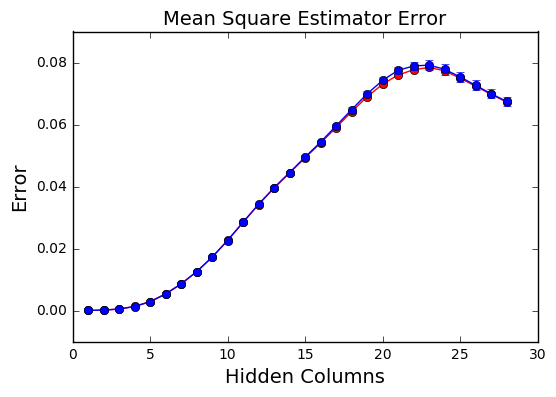

[  1.37576302e-05   1.21906234e-04   4.67992690e-04   1.31261522e-03
   2.88968320e-03   5.35720334e-03   8.57721156e-03   1.25003780e-02
   1.71774284e-02   2.26008161e-02   2.84792004e-02   3.41863673e-02
   3.95068646e-02   4.43399315e-02   4.92261790e-02   5.40128602e-02
   5.89467377e-02   6.41055405e-02   6.89018383e-02   7.29768477e-02
   7.59611765e-02   7.76597932e-02   7.84126922e-02   7.73164610e-02
   7.49639542e-02   7.23606621e-02   6.97364535e-02   6.72571780e-02]
[  2.12542702e-05   1.32078807e-04   4.66587836e-04   1.27886337e-03
   2.80517275e-03   5.29030714e-03   8.52575900e-03   1.24770607e-02
   1.71473525e-02   2.25479130e-02   2.84326389e-02   3.42378235e-02
   3.95748349e-02   4.44815655e-02   4.94631351e-02   5.43045051e-02
   5.95185895e-02   6.47624290e-02   6.98479230e-02   7.42141792e-02
   7.74701550e-02   7.88788386e-02   7.91554016e-02   7.78316254e-02
   7.53620965e-02   7.26535869e-02   6.99626074e-02   6.74660908e-02]


In [5]:
# plot mse 
plt.figure(1)
plt.plot(np.arange(1,29), train_colMSEs, '-o', c='r')
plt.plot(np.arange(1,29), test_colMSEs, '-o', c='b')
plt.errorbar(np.arange(1,29), test_colMSEs, yerr=splitTest_stddevs_col, linestyle='', c='b')
plt.title("Mean Square Estimator Error", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.xlabel("Hidden Columns", fontsize=14)
plt.show()

print train_colMSEs
print test_colMSEs

In [54]:
# np.save('mmse_hideColumns_train.npy', train_colMSEs)
# np.save('mmse_hideColumns_testSplits.npy', splitTest_colMSEs)

----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST da

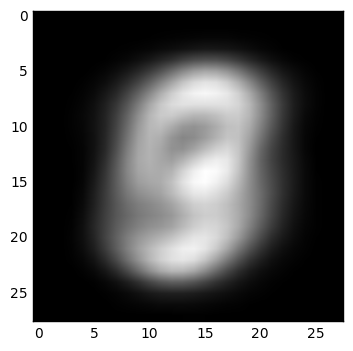

In [6]:
train_colMSEs_avgImage = np.zeros(28)
test_colMSEs_avgImage = np.zeros(28)
splitTest_colMSEs_avgImage = np.zeros((28,10))
splitTest_means_col_avgImage = np.zeros(28)
splitTest_stddevs_col_avgImage = np.zeros(28)

# -------------------------------------------------------------
#  Removing Different Number of Columns with average image
# -------------------------------------------------------------
avg_image = (np.mean(train, axis=1))
img = unpackcw(avg_image, 28, 28)
plt.imshow(img,cmap='gray')

train_avgImage = np.tile(avg_image, (55000, 1)).T
test_avgImage = np.tile(avg_image, (10000, 1)).T

for i in range(28):
    nCols = (i+1)
    vecMask = generateColumnMask(nCols)
        
    train_hideRight, Xtrain_hideRight, Ytrain_hideRight, \
    test_hideRight, Xtest_hideRight, Ytest_hideRight = returnHalfData(nCols)

    temp1, temp2, Ytrain_hideRight_hat = hideData(train_avgImage, vecMask)
    temp1, temp2, Ytest_hideRight_hat = hideData(test_avgImage, vecMask)

    diff_train = Ytrain_hideRight - Ytrain_hideRight_hat
    trainMSEs = np.zeros(55000)
    for j in range(55000):
        trainMSEs[j] = np.mean(np.multiply(diff_train[:, j], diff_train[:, j]))
    train_colMSEs_avgImage[i] = np.mean(trainMSEs)

    diff_test = Ytest_hideRight - Ytest_hideRight_hat
    testMSEs = np.zeros(10000)
    for j in range(10000):
        testMSEs[j] = np.mean(np.multiply(diff_test[:, j], diff_test[:, j]))
    test_colMSEs_avgImage[i] = np.mean(testMSEs)
    
    # Test data splits
    testSplit_Y_hat = np.zeros((10, Ytest_hideRight.shape[0], Ytest_hideRight.shape[1]/10))
    testSplit_Y = np.zeros((10, Ytest_hideRight.shape[0], Ytest_hideRight.shape[1]/10))

    for j in range(10):
        for k in range(10):
            testSplit_Y[j, :, k*100:(k+1)*100] = Ytest_hideRight[:, k*1000+j*100:k*1000+(j+1)*100]
            testSplit_Y_hat[j, :, k*100:(k+1)*100] = Ytest_hideRight_hat[:, k*1000+j*100:k*1000+(j+1)*100]
    
    for j in range(10):
        diff_testSplit = testSplit_Y[j] - testSplit_Y_hat[j]
        splitTest_colMSEs_avgImage[i][j] = np.mean(np.multiply(diff_testSplit, diff_testSplit))
    
    splitTest_means_col_avgImage[i] = np.mean(splitTest_colMSEs_avgImage[i])
    splitTest_stddevs_col_avgImage[i] = np.std(splitTest_colMSEs_avgImage[i])

In [ ]:
# np.save('mmse_avgImage_hideColumns_train.npy', train_colMSEs_avgImage)
# np.save('mmse_avgImage_hideColumns_testSplits.npy', splitTest_colMSEs_avgImage)

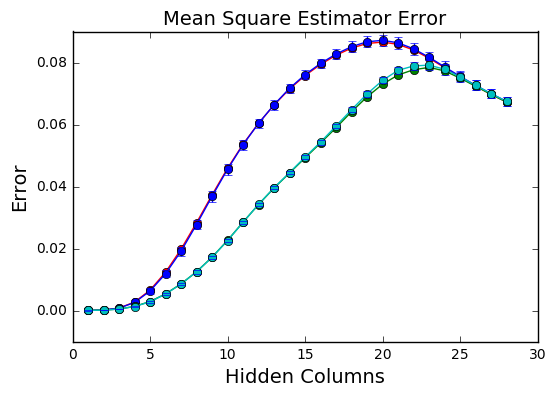

In [7]:
# plot mse 
plt.figure(1)
plt.plot(np.arange(1,29), train_colMSEs_avgImage, '-o', c='r')
plt.plot(np.arange(1,29), test_colMSEs_avgImage, '-o', c='b')
plt.errorbar(np.arange(1,29), test_colMSEs_avgImage, yerr=splitTest_stddevs_col_avgImage, linestyle='', c='b')

plt.plot(np.arange(1,29), train_colMSEs, '-o', c='g')
plt.plot(np.arange(1,29), test_colMSEs, '-o', c='c')
plt.errorbar(np.arange(1,29), test_colMSEs, yerr=splitTest_stddevs_col, linestyle='', c='b')

plt.title("Mean Square Estimator Error", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.xlabel("Hidden Columns", fontsize=14)
plt.show()

# Hiding Squares - MMSE

In [8]:
# --------------------------------------------------------
#  Removing Different Sized Squares with MMSE estimator
# --------------------------------------------------------
train_squareMSEs = np.zeros(14)
test_squareMSEs = np.zeros(14)
splitTest_squareMSEs = np.zeros((14,10))
splitTest_means_square = np.zeros(14)
splitTest_stddevs_square = np.zeros(14)

for i in range(14):
    squareSize = (i+1)*2
    vecMask = generateCenterSquareMask(squareSize)
    
    train_hideCenter, Xtrain_hideCenter, Ytrain_hideCenter, \
    test_hideCenter, Xtest_hideCenter, Ytest_hideCenter = returnSquareData(squareSize)
    
    u_x, u_y, cov_x, cov_yx = getStatistics(train, vecMask)
    Ytrain_hat_hideCenter = mmseEstimator(Xtrain_hideCenter, u_x, u_y, cov_x, cov_yx)
    Ytest_hat_hideCenter = mmseEstimator(Xtest_hideCenter, u_x, u_y, cov_x, cov_yx)
    
    diff_train = Ytrain_hideCenter - Ytrain_hat_hideCenter
    train_squareMSEs[i] = np.mean(np.multiply(diff_train, diff_train))

    diff_test = Ytest_hideCenter - Ytest_hat_hideCenter
    test_squareMSEs[i] = np.mean(np.multiply(diff_test, diff_test))
    
    # Test data splits
    testSplit_Y_hat = np.zeros((10, Ytest_hat_hideCenter.shape[0], Ytest_hat_hideCenter.shape[1]/10))
    testSplit_Y = np.zeros((10, Ytest_hideCenter.shape[0], Ytest_hideCenter.shape[1]/10))

    for j in range(10):
        for k in range(10):
            testSplit_Y[j, :, k*100:(k+1)*100] = Ytest_hideCenter[:, k*1000+j*100:k*1000+(j+1)*100]
            testSplit_Y_hat[j, :, k*100:(k+1)*100] = Ytest_hat_hideCenter[:, k*1000+j*100:k*1000+(j+1)*100]
    
    for j in range(10):
        diff_testSplit = testSplit_Y[j] - testSplit_Y_hat[j]
        splitTest_squareMSEs[i][j] = np.mean(np.multiply(diff_testSplit, diff_testSplit))
    
    splitTest_means_square[i] = np.mean(splitTest_squareMSEs[i])
    splitTest_stddevs_square[i] = np.std(splitTest_squareMSEs[i])
    
print splitTest_means_square
print splitTest_stddevs_square
print splitTest_squareMSEs

----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST da

In [ ]:
# np.save('mmse_hideSquares_train.npy', train_squareMSEs)
# np.save('mmse_hideSquares_testSplits.npy', splitTest_squareMSEs)

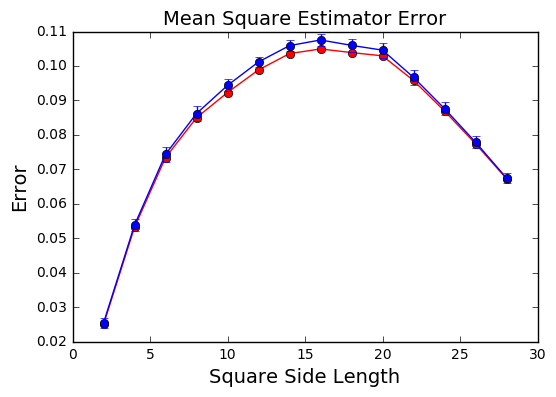

In [9]:
# plot mse 
plt.figure(1)
plt.plot(np.arange(2,30,2), train_squareMSEs, '-o', c='r')
plt.plot(np.arange(2,30,2), test_squareMSEs, '-o', c='b')
plt.errorbar(np.arange(2,30,2), test_squareMSEs, yerr=splitTest_stddevs_square, linestyle='', c='b')

plt.title("Mean Square Estimator Error", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.xlabel("Square Side Length", fontsize=14)
plt.show()

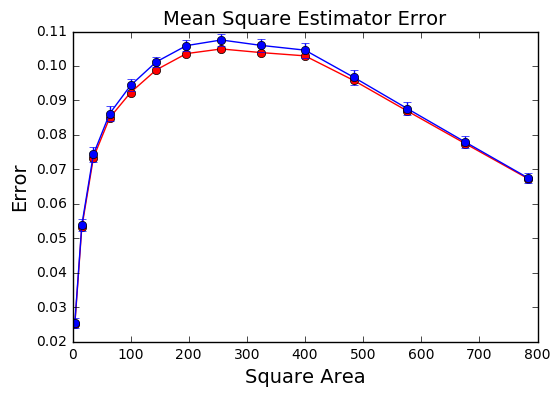

[ 0.02495093  0.05315097  0.07338964  0.08496643  0.09228839  0.09885148
  0.10358337  0.10493331  0.10388503  0.1029278   0.09577776  0.08692123
  0.07742932  0.06725718]
[ 0.02535188  0.05378368  0.07432837  0.08618174  0.09435436  0.10116793
  0.10589874  0.10754098  0.10597619  0.10458627  0.09668998  0.08761963
  0.07787362  0.06746609]
[ 0.00157054  0.0018426   0.00210934  0.00227017  0.00175264  0.00144949
  0.00169263  0.00165203  0.00188377  0.00217941  0.00210441  0.00196237
  0.00177643  0.00148243]


In [10]:
# plot mse 
plt.figure(1)
squareAreas = np.multiply(np.arange(2,30,2),np.arange(2,30,2))
plt.plot(squareAreas, train_squareMSEs, '-o', c='r')
plt.plot(squareAreas, test_squareMSEs, '-o', c='b')
plt.errorbar(squareAreas, test_squareMSEs, yerr=splitTest_stddevs_square, linestyle='', c= 'b')

plt.title("Mean Square Estimator Error", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.xlabel("Square Area", fontsize=14)
plt.show()

print train_squareMSEs
print test_squareMSEs
print splitTest_stddevs_square

# Hiding Squares - Avg Image

----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST dataset loaded----
Train data: 784 x 55000
Test data: 784 x 10000
----MNIST da

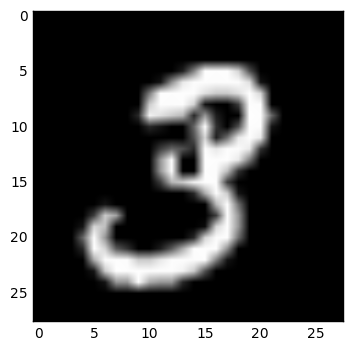

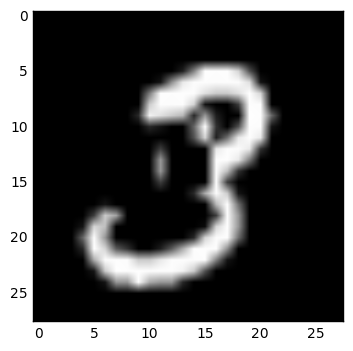

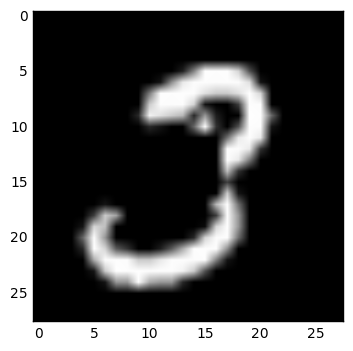

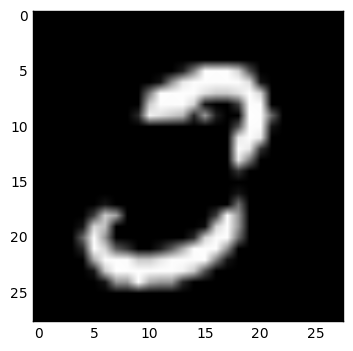

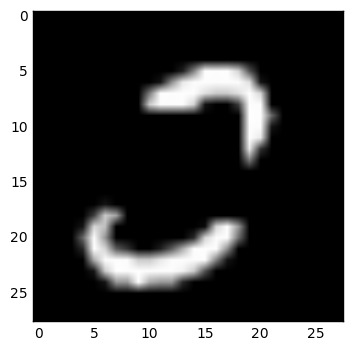

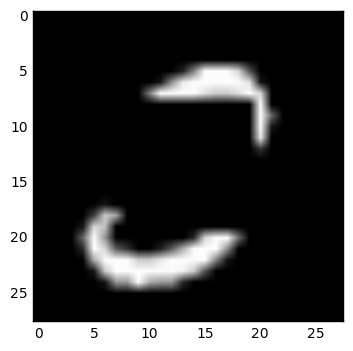

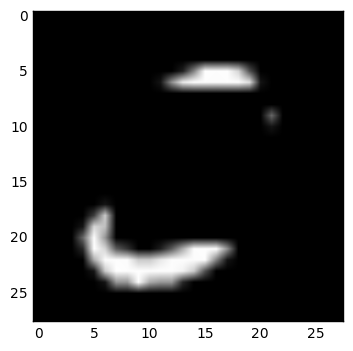

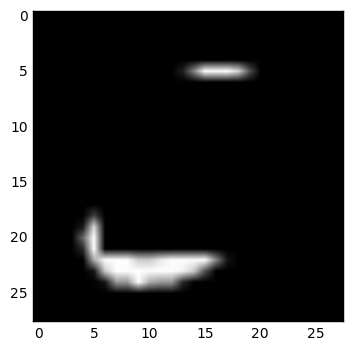

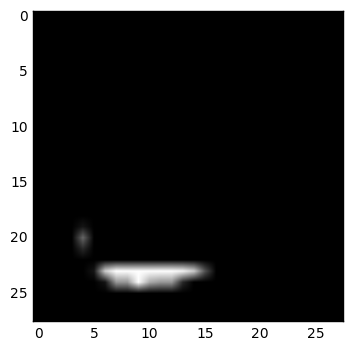

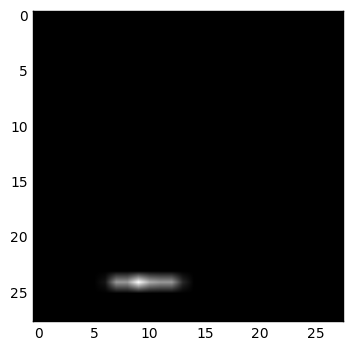

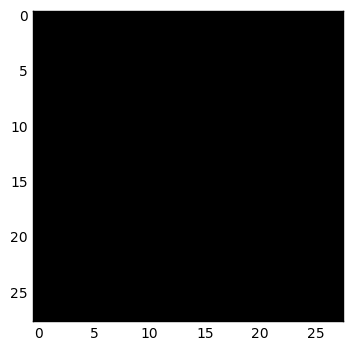

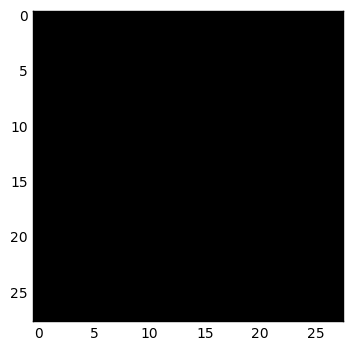

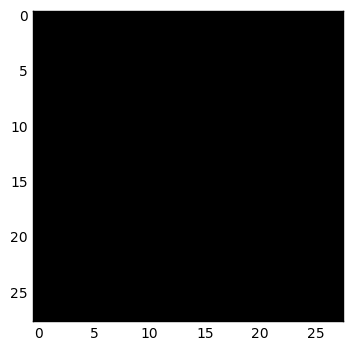

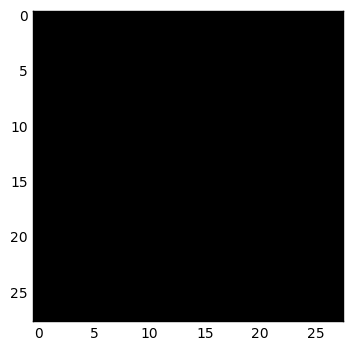

In [11]:
# --------------------------------------------------------
#  Removing Different Sized Squares with average image
# --------------------------------------------------------
train_squareMSEs_avgImage = np.zeros(14)
test_squareMSEs_avgImage = np.zeros(14)
splitTest_squareMSEs_avgImage = np.zeros((14,10))
splitTest_means_square_avgImage = np.zeros(14)
splitTest_stddevs_square_avgImage = np.zeros(14)

avg_image = (np.mean(train, axis=1))
img = unpackcw(avg_image, 28, 28)
plt.imshow(img,cmap='gray')

train_avgImage = np.tile(avg_image, (55000, 1)).T
test_avgImage = np.tile(avg_image, (10000, 1)).T

for i in range(14):
    squareSize = (i+1)*2
    vecMask = generateCenterSquareMask(squareSize)
    
    train_hideCenter, Xtrain_hideCenter, Ytrain_hideCenter, \
    test_hideCenter, Xtest_hideCenter, Ytest_hideCenter = returnSquareData(squareSize)
   
    plt.figure(i)
    img = unpackcw(train_hideCenter[:,1], 28, 28)
    plt.imshow(img,cmap='gray')

    temp1, temp2, Ytrain_hat_hideCenter = hideData(train_avgImage, vecMask)
    temp1, temp2, Ytest_hat_hideCenter = hideData(test_avgImage, vecMask)

    diff_train = Ytrain_hideCenter - Ytrain_hat_hideCenter
    train_squareMSEs_avgImage[i] = np.mean(np.multiply(diff_train, diff_train))

    diff_test = Ytest_hideCenter - Ytest_hat_hideCenter
    test_squareMSEs_avgImage[i] = np.mean(np.multiply(diff_test, diff_test))
    
    # Test data splits
    testSplit_Y_hat = np.zeros((10, Ytest_hat_hideCenter.shape[0], Ytest_hat_hideCenter.shape[1]/10))
    testSplit_Y = np.zeros((10, Ytest_hideCenter.shape[0], Ytest_hideCenter.shape[1]/10))

    for j in range(10):
        for k in range(10):
            testSplit_Y[j, :, k*100:(k+1)*100] = Ytest_hideCenter[:, k*1000+j*100:k*1000+(j+1)*100]
            testSplit_Y_hat[j, :, k*100:(k+1)*100] = Ytest_hat_hideCenter[:, k*1000+j*100:k*1000+(j+1)*100]
    
    for j in range(10):
        diff_testSplit = testSplit_Y[j] - testSplit_Y_hat[j]
        splitTest_squareMSEs_avgImage[i][j] = np.mean(np.multiply(diff_testSplit, diff_testSplit))
    
    splitTest_means_square_avgImage[i] = np.mean(splitTest_squareMSEs_avgImage[i])
    splitTest_stddevs_square_avgImage[i] = np.std(splitTest_squareMSEs_avgImage[i])

In [ ]:
# np.save('mmse_avgImage_hideSquares_train.npy', train_squareMSEs_avgImage)
# np.save('mmse_avgImage_hideSquares_testSplits.npy', splitTest_squareMSEs_avgImage)

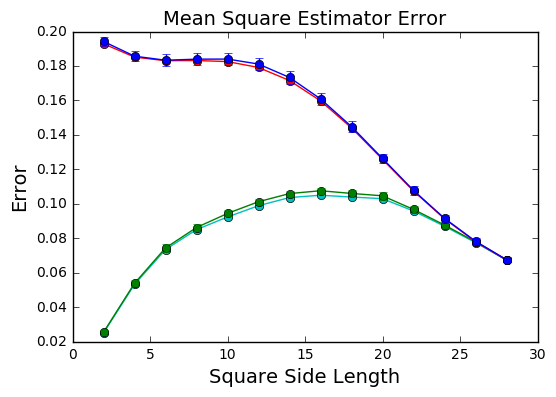

In [12]:
# plot mse 
plt.figure(1)

plt.plot(np.arange(2,30,2), train_squareMSEs, '-o', c='c')
plt.plot(np.arange(2,30,2), test_squareMSEs, '-o', c='g')
plt.errorbar(np.arange(2,30,2), test_squareMSEs, yerr=splitTest_stddevs_square, linestyle='', c='g')

plt.plot(np.arange(2,30,2), train_squareMSEs_avgImage, '-o', c='r')
plt.plot(np.arange(2,30,2), test_squareMSEs_avgImage, '-o', c='b')
plt.errorbar(np.arange(2,30,2), test_squareMSEs_avgImage, yerr=splitTest_stddevs_square_avgImage, linestyle='', c='b')

plt.title("Mean Square Estimator Error", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.xlabel("Square Side Length", fontsize=14)
plt.show()

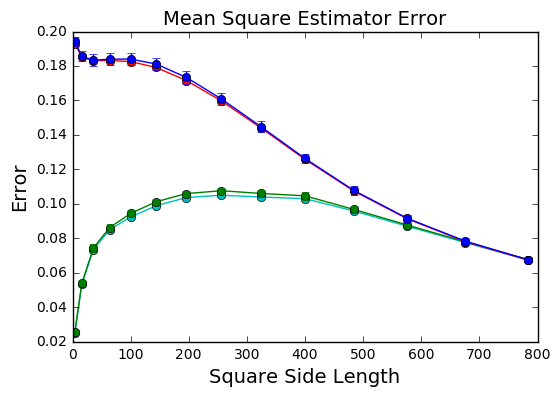

In [13]:
# plot mse 
plt.figure(1)
squareAreas = np.multiply(np.arange(2,30,2),np.arange(2,30,2))

plt.plot(squareAreas, train_squareMSEs, '-o', c='c')
plt.plot(squareAreas, test_squareMSEs, '-o', c='g')
plt.errorbar(squareAreas, test_squareMSEs, yerr=splitTest_stddevs_square, linestyle='', c= 'g')

plt.plot(squareAreas, train_squareMSEs_avgImage, '-o', c='r')
plt.plot(squareAreas, test_squareMSEs_avgImage, '-o', c='b')
plt.errorbar(squareAreas, test_squareMSEs_avgImage, yerr=splitTest_stddevs_square_avgImage, linestyle='', c= 'b')

plt.title("Mean Square Estimator Error", fontsize=14)
plt.ylabel("Error", fontsize=14)
plt.xlabel("Square Side Length", fontsize=14)
plt.show()